In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


# The CSV's first column is an index and Pandas will duplicate this and create an column without 'index_col=0'
df = pd.read_csv('C:/Users/josue/Desktop/WGU/D212/churn_clean.csv', index_col=0)
# Check data types and number of values, as well as overall size of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income                10

In [2]:
# Rename the 'item' columns to the specified survey response names
column_rename_map = {
    'Item1': 'Responses',
    'Item2': 'Solutions',
    'Item3': 'Replacements',
    'Item4': 'Reliability',
    'Item5': 'Options',
    'Item6': 'Respectfulness',
    'Item7': 'Courteous',
    'Item8': 'Listening'
}

# Apply the renaming
df.rename(columns=column_rename_map, inplace=True)
# Display the renamed columns
print("Renamed Columns:\n", df.columns)

Renamed Columns:
 Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
       'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children',
       'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Responses',
       'Solutions', 'Replacements', 'Reliability', 'Options', 'Respectfulness',
       'Courteous', 'Listening'],
      dtype='object')


In [3]:
# Save the modified dataset
output_file_path = 'churn_clean_updated.csv'
df.to_csv(output_file_path, index=False)

In [4]:
# Visually inspect dataframe to facilitate exploration, spot problems
pd.set_option("display.max_columns", None)
df.head(5)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Responses,Solutions,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [5]:
# Step 2: Select relevant continuous variables
selected_columns = [
    'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'
]
cluster_data = df[selected_columns]

# Step 3: Check for missing values
print("Initial Missing Values:\n", cluster_data.isnull().sum())

Initial Missing Values:
 Outage_sec_perweek    0
Tenure                0
MonthlyCharge         0
Bandwidth_GB_Year     0
dtype: int64


In [6]:
# Step 4: Handle missing values by dropping rows with missing values
cluster_data_cleaned = cluster_data.dropna()

# Step 5: Display the data after handling missing values
print("Data After Dropping Missing Values:\n", cluster_data_cleaned.head())


Data After Dropping Missing Values:
            Outage_sec_perweek     Tenure  MonthlyCharge  Bandwidth_GB_Year
CaseOrder                                                                 
1                    7.978323   6.795513     172.455519         904.536110
2                   11.699080   1.156681     242.632554         800.982766
3                   10.752800  15.754144     159.947583        2054.706961
4                   14.913540  17.087227     119.956840        2164.579412
5                    8.147417   1.670972     149.948316         271.493436


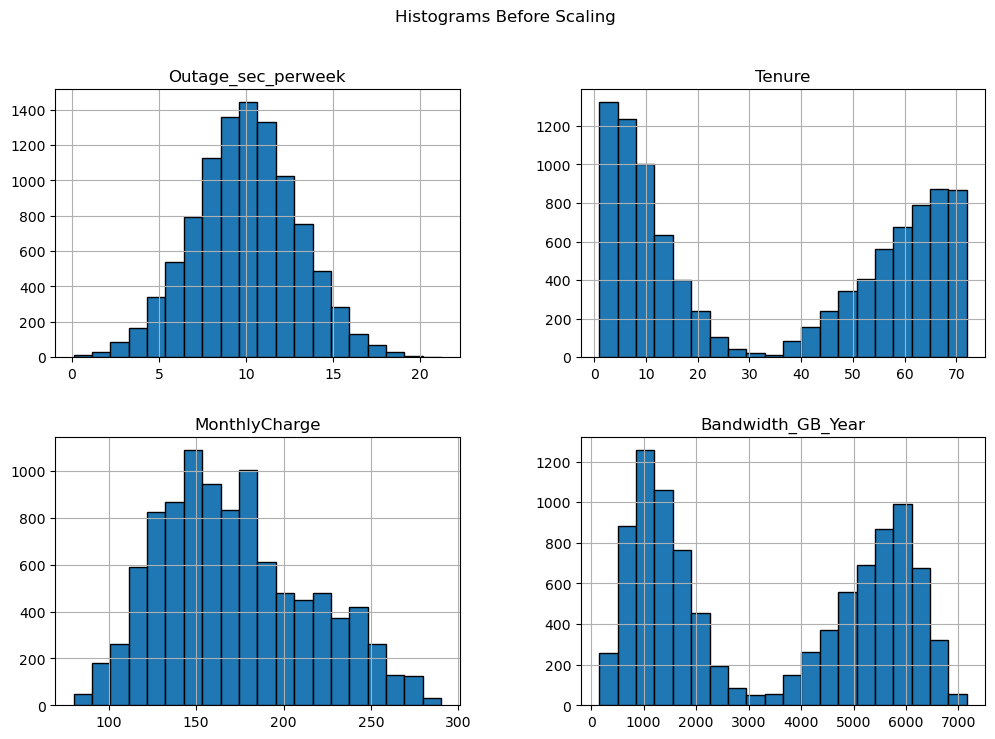

In [7]:
# Plotting histograms before scaling
cluster_data_cleaned.hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle('Histograms Before Scaling')
plt.show()



In [8]:
# Step 6: Standardize the continuous variables
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Convert to a DataFrame for clarity
cluster_data_scaled_df = pd.DataFrame(cluster_data, columns=selected_columns)


In [9]:

# Step 7: Display summary statistics after scaling
print("Summary Statistics After Scaling:\n", cluster_data_scaled_df.describe())

# Step 8: Display the first few rows of the standardized data
print("First Few Rows of Scaled Data:\n", cluster_data_scaled_df.head())

Summary Statistics After Scaling:
        Outage_sec_perweek        Tenure  MonthlyCharge  Bandwidth_GB_Year
count        10000.000000  10000.000000   10000.000000       10000.000000
mean            10.001848     34.526188     172.624816        3392.341550
std              2.976019     26.443063      42.943094        2185.294852
min              0.099747      1.000259      79.978860         155.506715
25%              8.018214      7.917694     139.979239        1236.470827
50%             10.018560     35.430507     167.484700        3279.536903
75%             11.969485     61.479795     200.734725        5586.141370
max             21.207230     71.999280     290.160419        7158.981530
First Few Rows of Scaled Data:
            Outage_sec_perweek     Tenure  MonthlyCharge  Bandwidth_GB_Year
CaseOrder                                                                 
1                    7.978323   6.795513     172.455519         904.536110
2                   11.699080   1.156681  

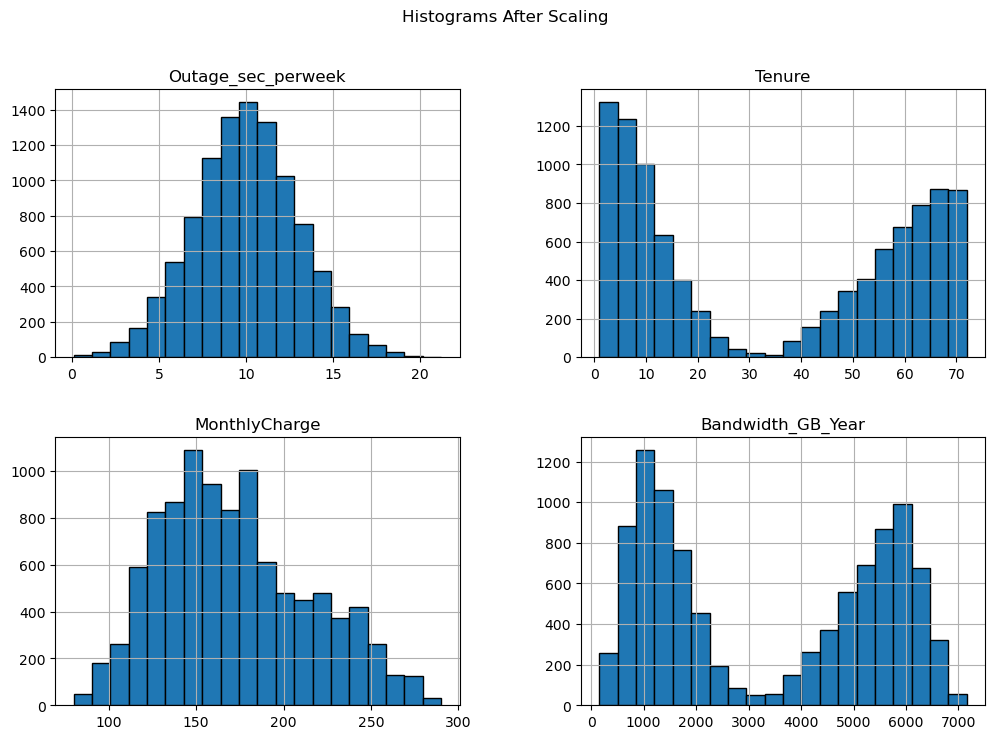

In [10]:
# Plotting histograms after scaling
cluster_data_scaled_df.hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle('Histograms After Scaling')
plt.show()

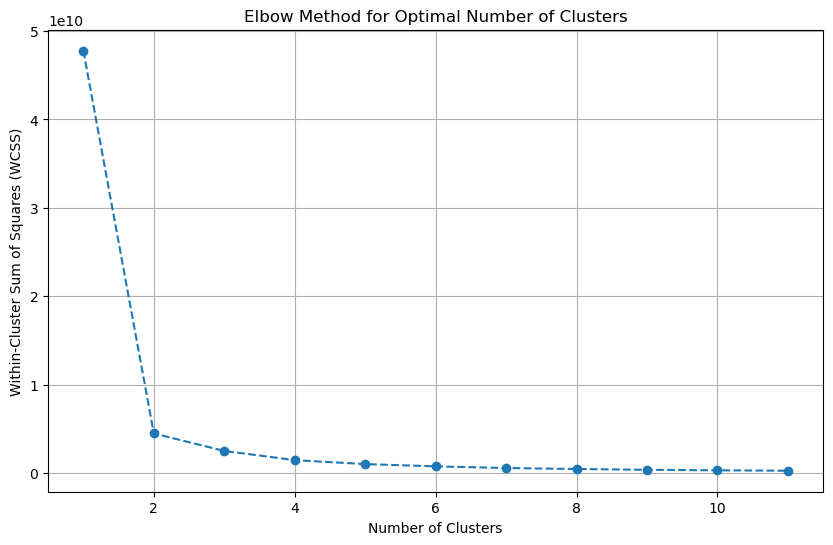

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Use the Elbow Method to find the optimal number of clusters
wcss = []
max_clusters = 11

# Calculate WCSS for 1 to max_clusters
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(cluster_data_scaled_df)
    wcss.append(kmeans.inertia_)

# Step 2: Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()


In [12]:
# Step 1: Fit the k-means model with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(cluster_data_scaled_df)

# Step 2: Add cluster labels to the DataFrame
cluster_data_scaled_df['Cluster'] = kmeans.labels_

# Step 3: Display the cluster distribution
print("Cluster Distribution:\n", cluster_data_scaled_df['Cluster'].value_counts())

# Step 4: Calculate the silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(cluster_data_scaled_df[selected_columns], cluster_data_scaled_df['Cluster'])
print(f"Silhouette Score for K-means Clustering: {silhouette_avg:.2f}")


Cluster Distribution:
 Cluster
1    4956
2    3170
0    1874
Name: count, dtype: int64
Silhouette Score for K-means Clustering: 0.69


In [13]:
output_file_path = 'final_cleaned_standardized_data.csv'
cluster_data_scaled_df.to_csv(output_file_path, index=False)
print(f"Final cleaned and standardized dataset saved to: {output_file_path}")


Final cleaned and standardized dataset saved to: final_cleaned_standardized_data.csv


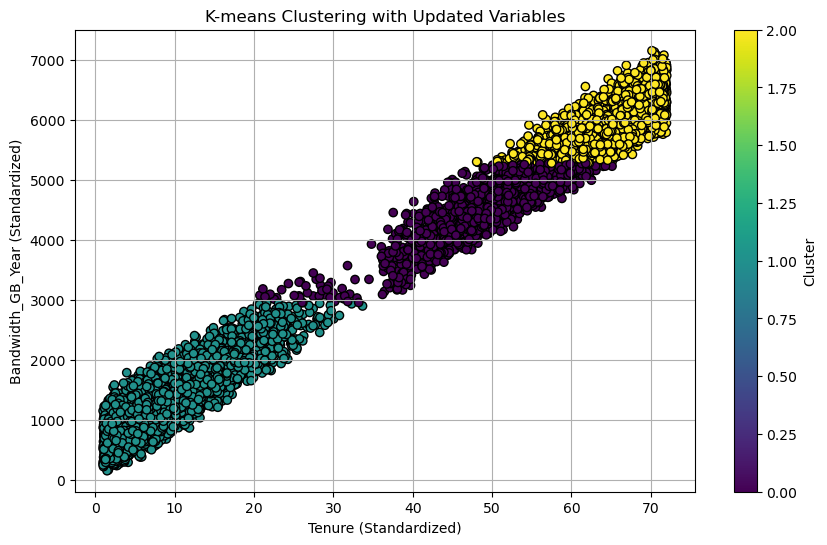

In [14]:
# Step 3: Plot the scatter plot for clusters using the top two most important features
plt.figure(figsize=(10, 6))
plt.scatter(
    cluster_data_scaled_df['Tenure'], 
    cluster_data_scaled_df['Bandwidth_GB_Year'], 
    c=cluster_data_scaled_df['Cluster'], cmap='viridis', edgecolor='k'
)
plt.title('K-means Clustering with Updated Variables')
plt.xlabel('Tenure (Standardized)')
plt.ylabel('Bandwidth_GB_Year (Standardized)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

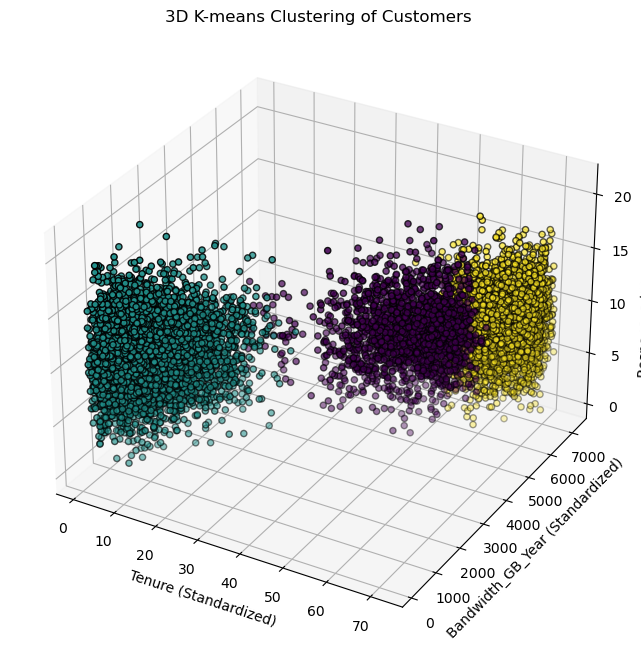

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Step 2: Plotting the 3D scatter plot with three variables
ax.scatter(cluster_data_scaled_df['Tenure'], 
           cluster_data_scaled_df['Bandwidth_GB_Year'], 
           cluster_data_scaled_df['Outage_sec_perweek'], 
           c=cluster_data_scaled_df['Cluster'], cmap='viridis', edgecolor='k')



# Step 3: Setting labels and title
ax.set_xlabel('Tenure (Standardized)')
ax.set_ylabel('Bandwidth_GB_Year (Standardized)')
ax.set_zlabel('Responses (Standardized)')
ax.set_title('3D K-means Clustering of Customers')

plt.show()

In [16]:
# Step 4: Fit the k-means model with 3 clusters (assuming 3 is optimal)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_data_scaled_df['Cluster'] = kmeans.fit_predict(cluster_data_scaled_df)

# Step 5: Calculate and display the silhouette score
silhouette_avg = silhouette_score(cluster_data_scaled_df[selected_columns], cluster_data_scaled_df['Cluster'])
silhouette_avg

0.6913015237289649

In [ ]:
# Inertia score from the k-means model
inertia_score = kmeans.inertia_

# Display the inertia score
print(f"Inertia Score for {optimal_clusters} clusters: {inertia_score:.2f}")